# Beschrijvende statistieken

Om een overzicht te krijgen van de verdeling en variatie binnen de dataset, worden beschrijvende statistieken berekend. Dit omvat de gemiddelde waarden, mediaan, standaarddeviatie en interkwartielafstand van de engagement-metrics (views, likes, shares en comments). Deze statistieken bieden inzicht in de verdeling van de data en helpen bij het detecteren van mogelijke outliers of patronen in de dataset. Daarnaast worden visualisaties zoals boxplots en scatterplots gebruikt om trends tussen de variabelen te identificeren.

## Stap 1: Klaarzetten van de notebook.

In deze stap worden alle nodige libraries en data ingeladen en klaargezet.<br>
Dit vereenvoudigt het verdere verloop van de notebook.

In [1]:
# Importeer standaard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Importeer de data
videos = pd.read_excel('../output/videos.xlsx')
comments = pd.read_excel('../output/comments.xlsx')

## Stap 2: Verkennen van de datasets.

### 2.1 Video Data

In [20]:
# Beschrijf de structuur van de dataset
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11 non-null     object 
 1   title           11 non-null     object 
 2   publish_date    11 non-null     object 
 3   duration        11 non-null     object 
 4   views           11 non-null     int64  
 5   likes           11 non-null     int64  
 6   dislikes        11 non-null     int64  
 7   shares          11 non-null     int64  
 8   comments        11 non-null     int64  
 9   views_24h       11 non-null     int64  
 10  views_1w        11 non-null     int64  
 11  views_2w        11 non-null     int64  
 12  views_1m        11 non-null     int64  
 13  views_2m        10 non-null     float64
 14  views_3m        3 non-null      float64
 15  likes_24h       11 non-null     int64  
 16  likes_1w        11 non-null     int64  
 17  likes_2w        11 non-null     int64

In [16]:
# Bestudeer de basis statistieken van de dataset
videos.describe()

,views,likes,dislikes,comments,views_24h,views_1w,views_2w,views_1m,views_2m,views_3m,...,dislikes_2m,dislikes_3m,comments_24h,comments_1w,comments_2w,comments_1m,comments_2m,comments_3m,is_beta,gender
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,3.000000,...,10.00000,3.0,11.000000,11.000000,11.000000,11.000000,10.00000,3.0,6.000000,11.000000
mean,2842.181818,63.545455,1.181818,5.272727,1153.545455,2101.636364,2356.545455,2542.545455,2719.600000,2652.666667,...,1.20000,2.0,2.727273,3.818182,4.181818,4.181818,4.20000,3.0,0.500000,0.363636
std,1409.026247,29.561338,1.662419,3.901049,413.806081,1247.392663,1352.430210,1390.616868,1483.998667,1177.461818,...,1.47573,2.0,1.348400,1.778661,1.721522,1.721522,1.75119,1.0,0.547723,0.504525
min,1136.000000,23.000000,0.000000,1.000000,560.000000,763.000000,855.000000,967.000000,1064.000000,1949.000000,...,0.00000,0.0,1.000000,2.000000,2.000000,2.000000,2.00000,2.0,0.000000,0.000000
25%,1979.000000,42.500000,0.000000,2.500000,841.000000,1421.500000,1579.500000,1724.500000,1853.500000,1973.000000,...,0.00000,1.0,2.000000,2.500000,3.000000,3.000000,3.00000,2.5,0.000000,0.000000
50%,2120.000000,52.000000,0.000000,4.000000,1086.000000,1461.000000,1652.000000,1805.000000,1950.500000,1997.000000,...,0.50000,2.0,2.000000,3.000000,4.000000,4.000000,4.00000,3.0,0.500000,0.000000
75%,3623.500000,88.000000,2.000000,7.500000,1520.000000,2493.000000,2898.000000,3215.000000,3577.250000,3004.500000,...,2.00000,3.0,3.000000,5.000000,5.500000,5.500000,5.75000,3.5,1.000000,1.000000
max,5949.000000,108.000000,5.000000,13.000000,1860.000000,5299.000000,5696.000000,5824.000000,5908.000000,4012.000000,...,4.00000,4.0,6.000000,7.000000,7.000000,7.000000,7.00000,4.0,1.000000,1.000000


### 2.2 Comment Data

In [17]:
# Beschrijf de structuur van de dataset
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         56 non-null     int64 
 1   id                 56 non-null     object
 2   comment_id         56 non-null     object
 3   parent_comment_id  19 non-null     object
 4   author             56 non-null     object
 5   published_at       56 non-null     object
 6   like_count         56 non-null     int64 
 7   comment_nl         56 non-null     object
 8   is_reply           56 non-null     bool  
 9   comment_en         56 non-null     object
dtypes: bool(1), int64(2), object(7)
memory usage: 4.1+ KB


## Stap 3: Vergelijkende analyses

### 3.1 Video Data

In [21]:
# Globaal beeld - Bereken waarden voor de engagement-metrics
metrics = ['views', 'likes', 'dislikes', 'shares', 'comments']
cta_stats_mean = videos.groupby('has_CTA')[metrics].mean()
cta_stats_median = videos.groupby('has_CTA')[metrics].median()
cta_stats_std = videos.groupby('has_CTA')[metrics].std()
cta_stats = pd.DataFrame({
    'mean': cta_stats_mean.stack().round(3),
    'median': cta_stats_median.stack().round(3),
    'std': cta_stats_std.stack().round(3)
})
cta_stats

mean  median       std
has_CTA                                     
False   views     3456.600  4127.0  1949.227
        likes       76.400    99.0    38.501
        dislikes     0.600     0.0     0.894
        shares      57.800    50.0    40.616
        comments     5.800     4.0     5.450
True    views     2330.333  2071.5   489.220
        likes       52.833    48.5    16.092
        dislikes     1.667     1.0     2.066
        shares      25.833    25.5     8.256
        comments     4.833     4.5     2.483

In [22]:
# Visualiseer de verdeling van het gemiddelde
cta_mean_table = pd.DataFrame({
    'Without CTA': cta_stats_mean.loc[False].values.round(3),
    'Metric': cta_stats_mean.columns,
    'With CTA': cta_stats_mean.loc[True].values.round(3)
})
cta_mean_table

,Without CTA,Metric,With CTA
0,3456.6,views,2330.333
1,76.4,likes,52.833
2,0.6,dislikes,1.667
3,57.8,shares,25.833
4,5.8,comments,4.833


In [23]:
# Visualiseer de verdeling van de mediaan
cta_median_table = pd.DataFrame({
    'Without CTA': cta_stats_median.loc[False].values.round(3),
    'Metric': cta_stats_median.columns,
    'With CTA': cta_stats_median.loc[True].values.round(3)
})
cta_median_table

,Without CTA,Metric,With CTA
0,4127.0,views,2071.5
1,99.0,likes,48.5
2,0.0,dislikes,1.0
3,50.0,shares,25.5
4,4.0,comments,4.5


In [24]:
# Visualiseer de verdeling van de standaarddeviatie
cta_std_table = pd.DataFrame({
    'Without CTA': cta_stats_std.loc[False].values.round(3),
    'Metric': cta_stats_std.columns,
    'With CTA': cta_stats_std.loc[True].values.round(3)
})
cta_std_table

,Without CTA,Metric,With CTA
0,1949.227,views,489.220
1,38.501,likes,16.092
2,0.894,dislikes,2.066
3,40.616,shares,8.256
4,5.450,comments,2.483


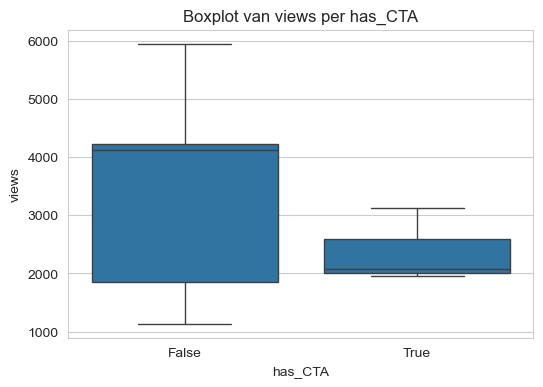

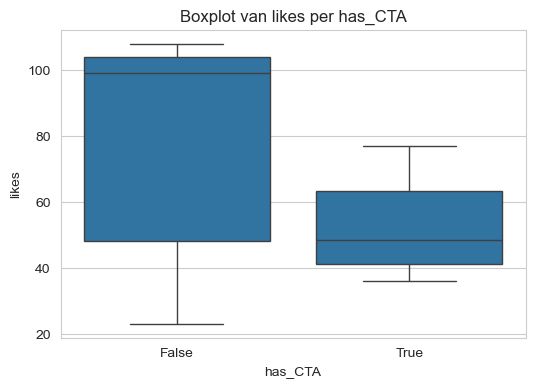

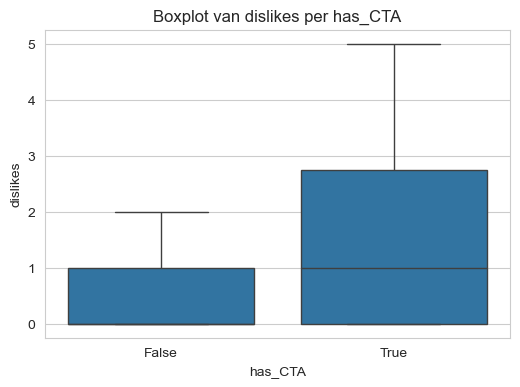

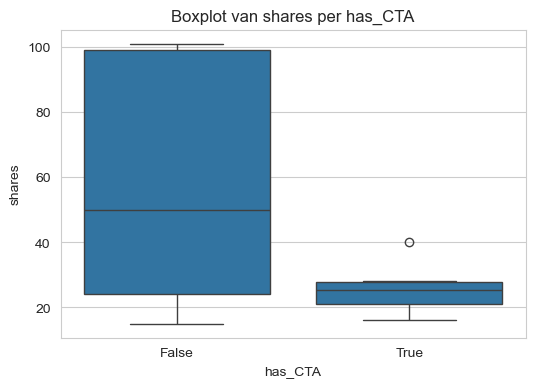

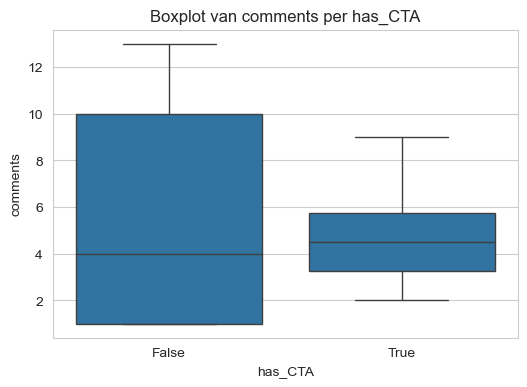

In [25]:
# Boxplots van de engagement-metrics per has_CTA
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='has_CTA', y=metric, data=videos)
    plt.title(f"Boxplot van {metric} per has_CTA")
    plt.xlabel("has_CTA")
    plt.ylabel(metric)
    plt.show();

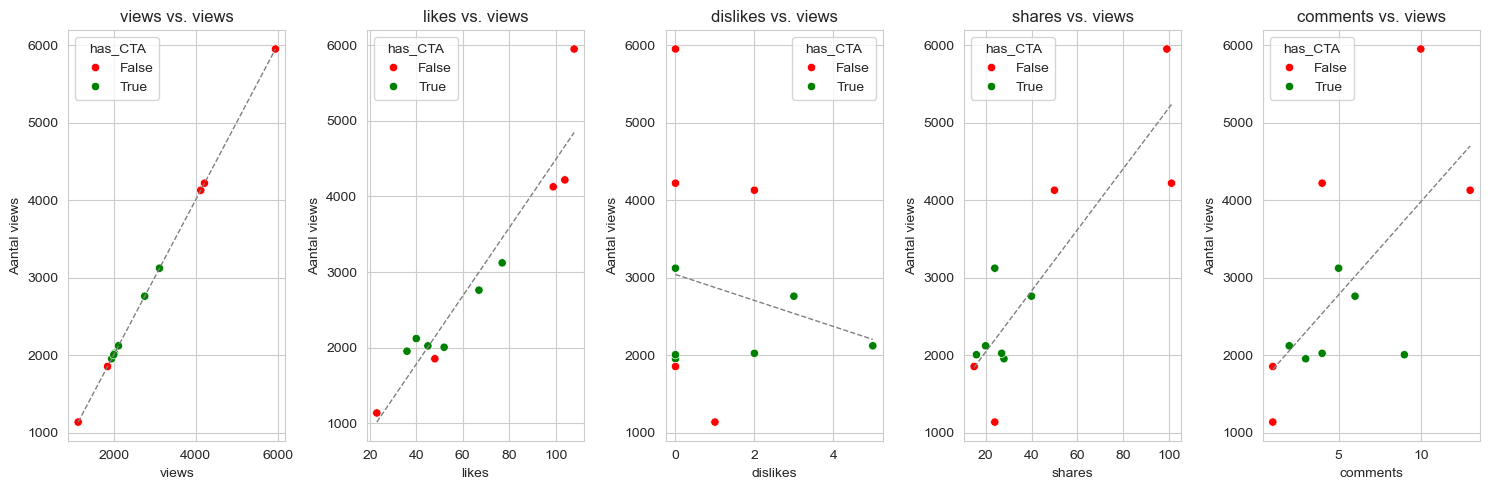

In [26]:
# Patronen bij views
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['views'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['views'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. views")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal views")
plt.tight_layout()
plt.show()

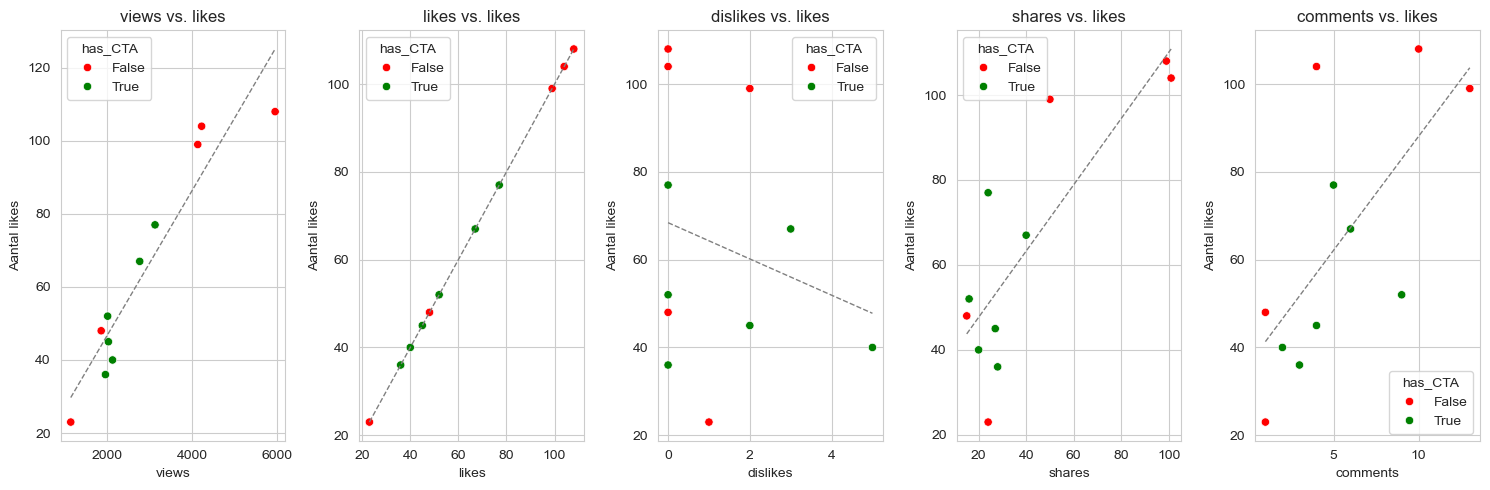

In [27]:
# Patronen bij likes
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['likes'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['likes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. likes")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal likes")
plt.tight_layout()
plt.show()

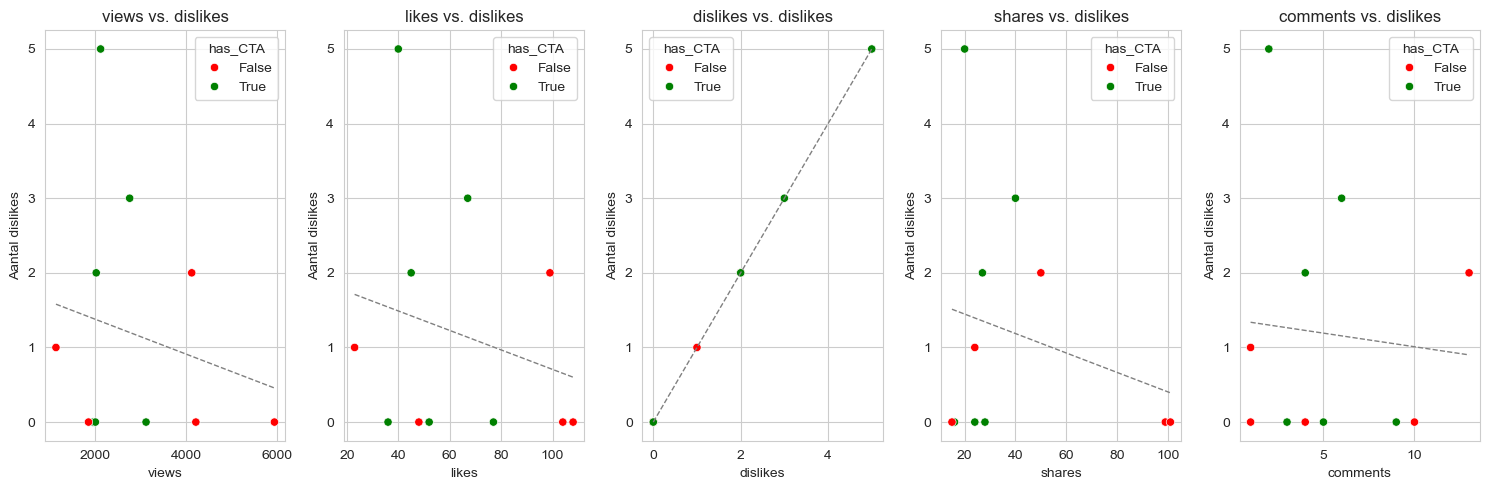

In [28]:
# Patronen bij dislikes
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['dislikes'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['dislikes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. dislikes")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal dislikes")
plt.tight_layout()
plt.show()

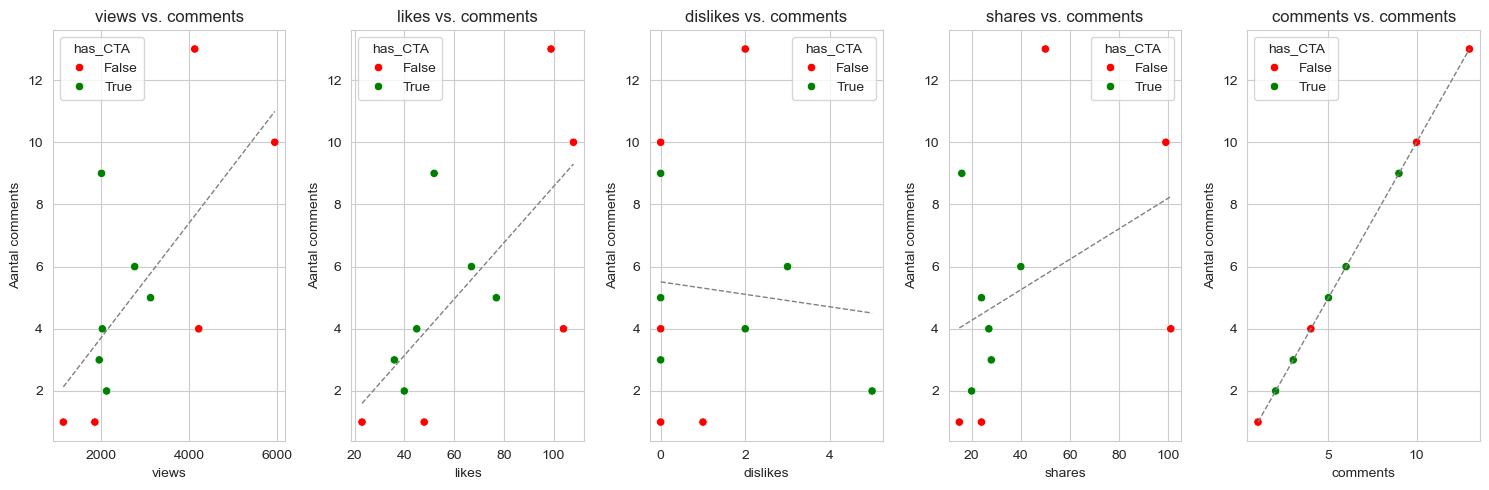

In [29]:
# Patronen bij comments
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['comments'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['comments'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. comments")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal comments")
plt.tight_layout()
plt.show()